# Analyse épidémiologique

Le but de ce TP est d'étudier deux modèles épidémiologiques, modélisant la propagation d’une épidémie au sein d'une population. 

## Le Modèle SIR

La population est constituée de trois catégories :
* $t\mapsto S(t)$ : Les individus sains n'ayant pas été infectés et susceptibles de l'être.
* $t\mapsto I(t)$ : Les individus infectés par la maladie et contagieux auprès de la population saine
* $t \mapsto R(t)$ : Le reste de la population, à savoir ceux qui ne peuvent plus être contaminés et qui ne sont plus contagieux.


Pour écrire le modèle, on fait les hypothèses suivantes :
* De nouveaux cas d'infections apparaissent lors du contact entre les population $S$ et $I$. On note $\beta$ la capacité que possède la maladie de contaminer la population $S$:
\begin{equation}
S'(t) = - \beta S(t) I(t).
\end{equation}
* La durée moyenne durant laquelle un individu est contagieux est noté $\tau$. En notant $f = 1/\tau$ la fréquence d'incubation, on a:
\begin{equation}
I'(t) = \beta S(t) I(t) - f I(t).
\end{equation}
* Enfin la population totale $N= S(t) + I(t) + R(t)$ est constante, et l'on a 
\begin{equation}
R'(t) = f I(t).
\end{equation}

Le problème s'écrit ainsi
\begin{align}
S'(t) &= - \beta S(t) I(t),\\
I'(t) &= \beta S(t) I(t) - f I(t),\\
R'(t) &= f I(t)
\end{align}

On note $X(t) = (S(t), I(t), R(t))$, $X_0 = (S_0, I_0, R_0)$, et par commodité, on prend $N=1$ (i.e. nous regardons des densités de population).



>**A faire :** Ecrire ce problème sous la forme d'un système différentiel autonome $X'(t) = F(X(t))$, ainsi qu'une fonction qui retourne $F$ et sa matrice Jacobienne. On choisira
\begin{equation}
\beta = 8, \quad f = 4,3.
\end{equation}

In [1]:
from enum import Enum
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

Function

In [2]:
def function(X, b = 8, f = 4.3):
    S,I,R = X
    result = np.zeros(3)
    result[0] = -b*S*I
    result[1] = b*S*I - f*I
    result[2] = f*I
    Jacob = np.array([[-b*I,-b*S,0],[b*I,b*S-f,0],[0,f,0]])
    return result,Jacob

>**A faire :** Ecrire les méthodes d'Euler explicite, RK2, Euler implicite et RK4 afin de résoudre numériquement le système jusqu'au temps  $𝑇=3$ . On choisira pour condition initiale  $𝑋_0=(0.99,0.01,0)$. Justifier en particulier cette condition initiale.

Euler explicit

In [3]:
def EulerExplicite(T,dt,f,yini):
    niter = int(T/dt)+1
    size = len(yini)
    result = np.zeros((niter,size))
    result[0] = yini
    y = yini
    for i in range(niter-1):
        y = y + dt * f(y)[0]
        result[i+1] = y
    return result

RK2

In [4]:
def RK2(T,dt,f,yini):
    niter = int(T/dt)+1
    size = len(yini)
    result = np.zeros((niter,size))
    result[0] = yini
    y = yini
    for i in range(niter-1):
        k1 = f(y)[0]
        k2 = f(y + dt*k1/2)[0]
        y = y + dt * k2
        result[i+1] = y
    return result

Euleur implicite

In [5]:
jlimit = 1e-12
nlimit = 100
def EulerImplicite(T,dt,f,yini):
    niter = int(T/dt)+1
    size = len(yini)
    result = np.zeros((niter,size))
    result[0] = yini
    x = np.array(yini)
    y = x
    y = np.array(y)
    fx,dx = f(x)
    dk = np.linalg.solve(np.identity(3) - dt*dx,-x + dt*fx + y)
    for i in range(niter-1):
        n = 0
        y = result[i]
        while np.linalg.norm(x - dt*fx - y) > jlimit and n < nlimit:
            n +=1
            fx,dx = f(x)
            dk = np.linalg.solve(np.identity(3)- dt * dx,- x + dt*fx + y)
            x = x + dk
        y = x
        result[i+1] = y
    return result

RK4

In [6]:
def RK4(T,dt,f,yini):
    niter = int(T/dt)+1
    size = len(yini)
    result = np.zeros((niter,size))
    result[0] = yini
    y = yini
    for i in range(niter-1):
        k1 = f(y)[0]
        k2 = f(y + dt*k1/2)[0]
        k3 = f(y + dt*k2/2)[0]
        k4 = f(y + dt*k3)[0]
        y = y + dt * (k1 + 2*k2 + 2*k3 + k4)/6
        result[i+1] = y
    return result

Test

In [7]:
#Constant
T = 5
dt = T/200
Y0 = [0.99,0.01,0]

#Approximation différents
Test_EE = EulerExplicite(T,dt,function,Y0)
Test_RK2 = RK2(T,dt,function,Y0)
Test_RK4 = RK4(T,dt,function,Y0)
Test_EI = EulerImplicite(T,dt,function,Y0)
abcisse = np.linspace(0,3,len(Test_EE))

Afficher 

<IPython.core.display.Javascript object>


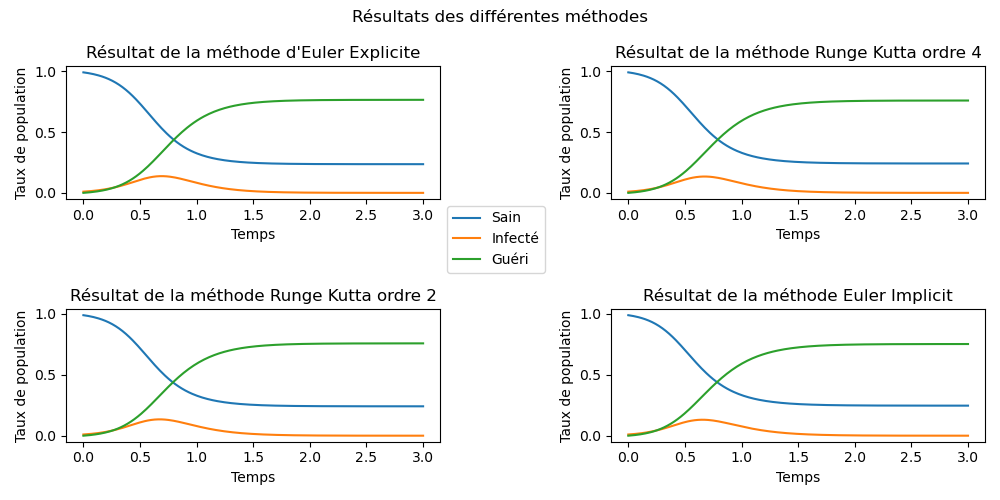

In [8]:
#Afficher des résultats pour différents méthods
figMeth, axsMeth = plt.subplots(2,2, figsize = (10,5))
figMeth.suptitle('Résultats des différentes méthodes')
#Euler explicit
axsMeth[0,0].plot(abcisse,Test_EE[:,0],label = 'Sain')
axsMeth[0,0].plot(abcisse,Test_EE[:,1],label = 'Infecté')
axsMeth[0,0].plot(abcisse,Test_EE[:,2],label = 'Guéri')
axsMeth[0,0].set_xlabel('Temps')
axsMeth[0,0].set_ylabel('Taux de population')
axsMeth[0,0].set_title(f'Résultat de la méthode d\'Euler Explicite')
axsMeth[0,0].legend(loc='upper left', bbox_to_anchor=(1, 0))
#Runge Kutta ordre 2
axsMeth[1,0].plot(abcisse,Test_RK2[:,0])
axsMeth[1,0].plot(abcisse,Test_RK2[:,1])
axsMeth[1,0].plot(abcisse,Test_RK2[:,2])
axsMeth[1,0].set_xlabel('Temps')
axsMeth[1,0].set_ylabel('Taux de population')
axsMeth[1,0].set_title(f'Résultat de la méthode Runge Kutta ordre 2')
#Runge Kutta ordre 4
axsMeth[0,1].plot(abcisse,Test_RK4[:,0])
axsMeth[0,1].plot(abcisse,Test_RK4[:,1])
axsMeth[0,1].plot(abcisse,Test_RK4[:,2])
axsMeth[0,1].set_xlabel('Temps')
axsMeth[0,1].set_ylabel('Taux de population')
axsMeth[0,1].set_title(f'Résultat de la méthode Runge Kutta ordre 4')
#Euler Implicit
axsMeth[1,1].plot(abcisse,Test_EI[:,0])
axsMeth[1,1].plot(abcisse,Test_EI[:,1])
axsMeth[1,1].plot(abcisse,Test_EI[:,2])
axsMeth[1,1].set_xlabel('Temps')
axsMeth[1,1].set_ylabel('Taux de population')
axsMeth[1,1].set_title(f'Résultat de la méthode Euler Implicit')
plt.tight_layout()
plt.show()

Comparaison de différentes méthodes:

<IPython.core.display.Javascript object>


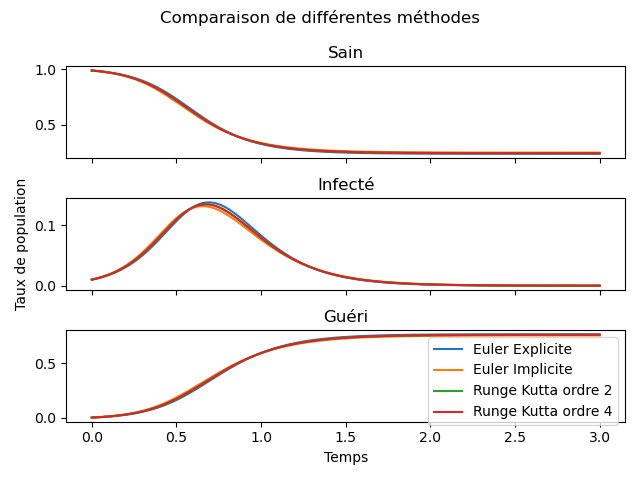

In [9]:
figComp, axsComp = plt.subplots(3, sharex = True)
figComp.suptitle('Comparaison de différentes méthodes')
for i in range(3):
    axsComp[i].plot(abcisse,Test_EE[:,i],label = 'Euler Explicite')
    axsComp[i].plot(abcisse,Test_EI[:,i],label = 'Euler Implicite')
    axsComp[i].plot(abcisse,Test_RK2[:,i],label = 'Runge Kutta ordre 2') 
    axsComp[i].plot(abcisse,Test_RK4[:,i],label = 'Runge Kutta ordre 4')
axsComp[1].set_ylabel('Taux de population')
axsComp[2].set_xlabel('Temps')
axsComp[0].set_title('Sain')
axsComp[1].set_title('Infecté')
axsComp[2].set_title('Guéri')
plt.tight_layout()
plt.legend()
plt.show()

>**A faire :** Tracer $I$ en fonction de $S$ pour différentes conditions initiales. On choisira par exemple $𝑋_0=(0.9+0.01k,0.1-0.01k,0)$ avec $k \in \left\lbrace 0,9 \right\rbrace$. Discuter les deux dynamiques observées ($S$ croissant/décroissant) en fonction de la courbe $S=f/\beta$. Conclure sur une stratégie de vaccination en fonction des paramètres.

<IPython.core.display.Javascript object>


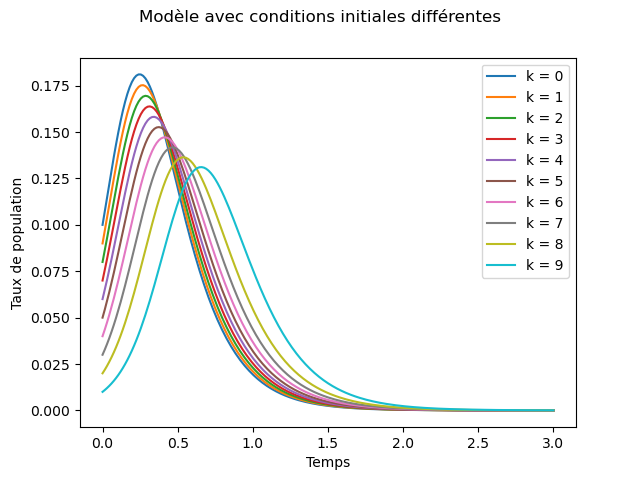

In [10]:
Y = np.array([[0.9+0.01*i,0.1-0.01*i,0] for i in range(10)])
plot = [[EulerImplicite(T,dt,function,Y[i])[:,1]] for i in range(10)]
plt.figure()
plt.suptitle('Modèle avec conditions initiales différentes')
for i in range(10):
    plt.plot(abcisse,np.concatenate(plot[i]),label = f'k = {i}')
plt.xlabel('Temps')
plt.ylabel('Taux de population')
plt.legend()
plt.show()

>**Bonus :** (à faire après le modèle SZR ci-dessous) Etudier la durée de l'épidémie en fonction des paramètres. On pourra ecrire $I$ comme une fonction de $S$ et étudier la courbe obtenue. Etudier la durée de l'épidémie en fonction des paramètres.

## Modèle SZR : Invasion de Zombie

Une variante du modèle SIR est le modèle SZR proposé en 2009 par Munz, Hudea, Imad et Smith. On note toujours $S$ la population saine, $Z$ est maintenant une population de Zombie et $R$ représente la reste de la population, avec notamment les personnes mortes mais pouvant se transformées en Zombie. La dynamique est la suivante :
\begin{align}
S'(t) &= - \beta S(t) I(t),\\
I'(t) &= (\beta -\alpha) S(t) I(t) + \zeta R(t),\\
R'(t) &= \alpha S(t) I(t) -\zeta R(t).
\end{align}

* Lorsqu'une personne saine rencontre un Zombie, il y a deux possibilités : la personne saine est mordue et devient un Zombie (terme $-\beta SZ$), ou alors le Zombie est tué, et passe dans la population $R$ (terme $\alpha SZ$).

* La population $R$ peut spontanément se transformer en Zombie (terme $\zeta R$)

>**A faire :** Implémenter le champ de vecteur associé. Calculer sa Jacobienne et résoudre ce problème en utilisant les algorithmes d'Euler et de Runge-Kutta jusqu'au temps $T=120$. On choisira $\beta =1$, $\alpha = 4$ et $\zeta = 0.2$, ainsi que la population initiale 
\begin{equation*}
X_0 =[S_0,Z_0,R_0] = [0.99,0.01,0]
\end{equation*}

Constant

In [11]:
b = 1
a = 4
c = 0.2
T = 120
dt = T/200

In [12]:
def functionz(X, b = 1,a = 4, c = 0.2):
    S,Z,R = X
    result = np.zeros(3)
    result[0] = -b*S*Z
    result[1] = (b-a)*S*Z + c*R
    result[2] = a*S*Z - c*R
    Jacob = np.array([[-b*Z,-b*S,0],[(b-a)*Z,(b-a)*S,c],[a*Z,a*S,-c]])
    return result, Jacob

Test


In [13]:
Testz_EE = EulerExplicite(T,dt,functionz,Y0)
Testz_RK2 = RK2(T,dt,functionz,Y0)
Testz_EI = EulerImplicite(T,dt,functionz,Y0)
Testz_RK4 = RK4(T,dt,functionz,Y0)
n = len(Testz_EE)
abcisse = np.linspace(0,T,n)

<IPython.core.display.Javascript object>


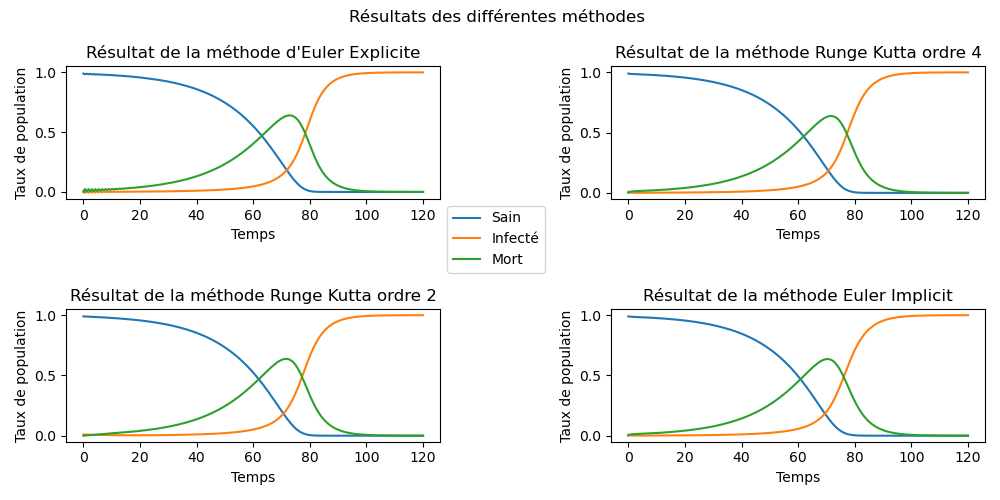

In [14]:
#Afficher des résultats pour différents méthods
figMethZ, axsMethZ = plt.subplots(2,2, figsize = (10,5))
figMethZ.suptitle('Résultats des différentes méthodes ')
#Euler explicit
axsMethZ[0,0].plot(abcisse,Testz_EE[:,0],label = 'Sain')
axsMethZ[0,0].plot(abcisse,Testz_EE[:,1],label = 'Infecté')
axsMethZ[0,0].plot(abcisse,Testz_EE[:,2],label = 'Mort')
axsMethZ[0,0].set_xlabel('Temps')
axsMethZ[0,0].set_ylabel('Taux de population')
axsMethZ[0,0].set_title(f'Résultat de la méthode d\'Euler Explicite')
axsMethZ[0,0].legend(loc='upper left', bbox_to_anchor=(1, 0))
#Runge Kutta ordre 2
axsMethZ[1,0].plot(abcisse,Testz_RK2[:,0])
axsMethZ[1,0].plot(abcisse,Testz_RK2[:,1])
axsMethZ[1,0].plot(abcisse,Testz_RK2[:,2])
axsMethZ[1,0].set_xlabel('Temps')
axsMethZ[1,0].set_ylabel('Taux de population')
axsMethZ[1,0].set_title(f'Résultat de la méthode Runge Kutta ordre 2')
#Runge Kutta ordre 4
axsMethZ[0,1].plot(abcisse,Testz_RK4[:,0])
axsMethZ[0,1].plot(abcisse,Testz_RK4[:,1])
axsMethZ[0,1].plot(abcisse,Testz_RK4[:,2])
axsMethZ[0,1].set_xlabel('Temps')
axsMethZ[0,1].set_ylabel('Taux de population')
axsMethZ[0,1].set_title(f'Résultat de la méthode Runge Kutta ordre 4')
#Euler Implicit
axsMethZ[1,1].plot(abcisse,Testz_EI[:,0])
axsMethZ[1,1].plot(abcisse,Testz_EI[:,1])
axsMethZ[1,1].plot(abcisse,Testz_EI[:,2])
axsMethZ[1,1].set_xlabel('Temps')
axsMethZ[1,1].set_ylabel('Taux de population')
axsMethZ[1,1].set_title(f'Résultat de la méthode Euler Implicit')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


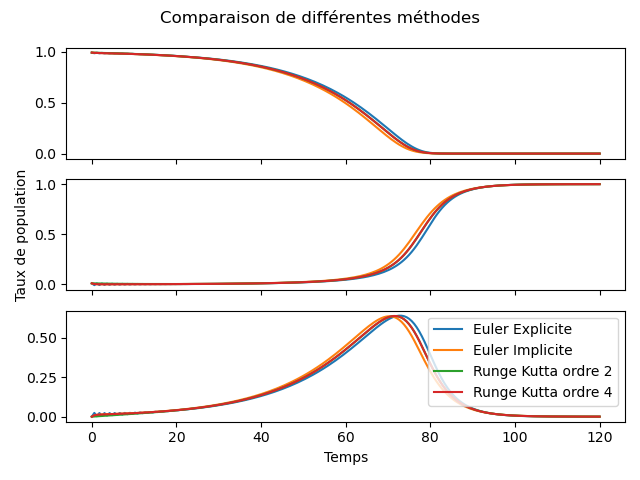

In [15]:
figCompZ, axsCompZ = plt.subplots(3, sharex = True)
figCompZ.suptitle('Comparaison de différentes méthodes')
for i in range(3):
    axsCompZ[i].plot(abcisse,Testz_EE[:,i],label = 'Euler Explicite')
    axsCompZ[i].plot(abcisse,Testz_EI[:,i],label = 'Euler Implicite')
    axsCompZ[i].plot(abcisse,Testz_RK2[:,i],label = 'Runge Kutta ordre 2') 
    axsCompZ[i].plot(abcisse,Testz_RK4[:,i],label = 'Runge Kutta ordre 4')
axsCompZ[1].set_ylabel('Taux de population')
axsCompZ[2].set_xlabel('Temps')
axsComp[0].set_title('Sain')
axsComp[1].set_title('Infecté')
axsComp[2].set_title('Guéri')
plt.tight_layout()
plt.legend()
plt.show()

### Ordre des méthodes

On suppose que la solution donnée par la méthode RK4 avec $\displaystyle h=\frac{T}{2^{18}}$ est une excellente approximation de la solution. On appelle $y(30)$ la valeur finale obtenue.

>**A faire :** Calculer au temps $T=30$, l'écart $\displaystyle E_{\text{Euler exp}}(h)=\left \|y(30)-y_{\text{Euler exp}}^h(30)\right \|$ entre cette solution et la solution donnée par Euler explicite au temps final $T$ pour le pas de temps $h$. Effectuer ce calcul pour $h=\frac{T}{2^k}$ avec $k \in \{ 8,\dots , 15\}$. Faire de même avec Euler implicite, RK2 et RK4.
Tracer sur un même graphe, $\ln (E)$ en fonction de $k$. Que pouvez vous en conclure?

In [16]:
eurreur = np.zeros((8,4))
result_array = RK4(T,T/(2**18),functionz,Y0)
result_time = 2**16
result = result_array[result_time]

In [17]:
for i in range(8,16):
    dt = T/(2**i)
    Testz_RK4 = RK4(T,dt,functionz,Y0)
    Testz_EI = EulerImplicite(T,dt,functionz,Y0)
    Testz_RK2 = RK2(T,dt,functionz,Y0)
    Testz_EE = EulerExplicite(T,dt,functionz,Y0)
    T30 = int(30/dt)
    eEE = np.linalg.norm(result - Testz_EE[T30])
    eEI = np.linalg.norm(result - Testz_EI[T30])
    eRK2 = np.linalg.norm(result - Testz_RK2[T30])
    eRK4 = np.linalg.norm(result - Testz_RK4[T30])
    eurreur[i-8] = [eEE,eEI,eRK2,eRK4]
eurreur = np.array(eurreur)


<IPython.core.display.Javascript object>


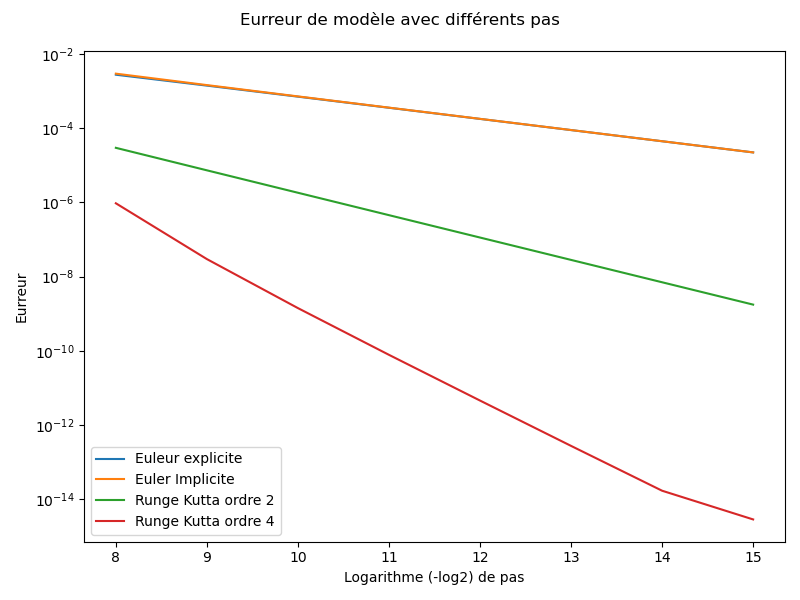

In [18]:
plt.figure('Eurreur de modele avec différents pas', figsize = (8,6))
plt.suptitle('Eurreur de modèle avec différents pas')
plt.semilogy(range(8,16),eurreur[:,0],label = 'Euleur explicite')
plt.semilogy(range(8,16),eurreur[:,1],label = 'Euler Implicite')
plt.semilogy(range(8,16),eurreur[:,2],label = 'Runge Kutta ordre 2')
plt.semilogy(range(8,16),eurreur[:,3],label = 'Runge Kutta ordre 4')
plt.xlabel('Logarithme (-log2) de pas')
plt.ylabel('Eurreur')
plt.tight_layout()
plt.legend()
plt.show()


### Modèle avec vaccin

On suppose maintenant qu’un médicament existe, qu'il permet de guérir les zombies, et donc les faire repasser dans la catégorie $S$. Le modèle devient alors :
$$
\left \{
\begin{array}{l}
S'=- \beta SZ + c Z\\
Z' = (\beta -\alpha) SZ + \zeta R  - c Z\\
R' = \alpha SZ - \zeta R.
\end{array}
\right.
$$
>**A faire :** Calculez l'évolution de ce nouveau modèle, avec les mêmes paramètres que pour la question précédente, et différentes valeurs du paramètre $c$ (On pourra commencer avec $c=0.005$). Que constatez-vous ?

In [19]:
def functionvz(X, a = 4, b = 1, c = 0.2):
    S,Z,R = X
    result = np.zeros(3)
    result[0] = -b*S*Z + v*Z
    result[1] = (b-a)*S*Z + c*R - v*Z
    result[2] = a*S*Z - c*R
    Jacob = np.array([[-b*Z,-b*S + v,0],[(b-a)*Z,(b-a)*S - v,c],[a*Z,a*S,-c]])
    return result, Jacob

<IPython.core.display.Javascript object>


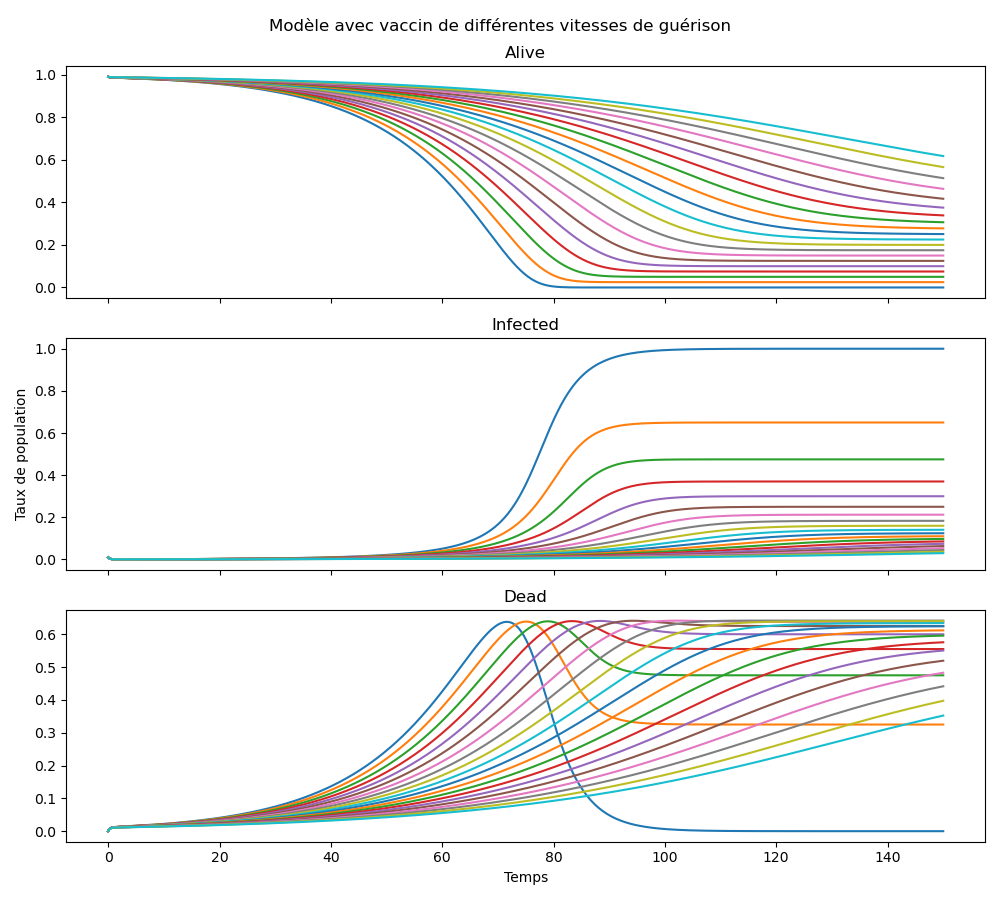

In [20]:
T = 150
dt = T/10000
n = 1 + int(T/dt) 
figMed, axsMed = plt.subplots(3, sharex = True, figsize = (10,9))
temp = np.linspace(0,T,n)
for i in np.arange(0,0.5,0.025):
    v = i
    result = RK4(T, dt, functionvz, Y0)
    axsMed[0].plot(temp, result[:,0])
    axsMed[1].plot(temp, result[:,1])
    axsMed[2].plot(temp, result[:,2])
figMed.suptitle('Modèle avec vaccin de différentes vitesses de guérison')
axsMed[1].set_ylabel('Taux de population')
axsMed[2].set_xlabel('Temps')
axsMed[0].set_title('Alive')
axsMed[1].set_title('Infected')
axsMed[2].set_title('Dead')
plt.tight_layout()
plt.show()